<a href="https://colab.research.google.com/github/PrashantShrivastava1612/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - NYC Taxi Trip Time Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
from datetime import date

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
path = "/content/drive/MyDrive/Almabetter/Capstone Project/NYC Taxi Trip Time Prediction/NYC Taxi Data.csv"
dataset = pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dataset.shape

(1458644, 11)

We have 11 variables(columns) and 1458644 observtions(rows) in our dataset.

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

We have 0 duplicate rows in our dataset.

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dataset.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

We have no null values in any column of our dataset.

### What did you know about your dataset?

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). We have to analyse duration of  trips and the insights behind it.


The above dataset has 1458644 rows and 11 columns. There are no mising values and duplicate values in the dataset. 

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [10]:
# Dataset Describe
dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description 

**INDEPENDENT VARIABLES**

**id** - a unique identifier for each trip

**vendor_id** - a code indicating the provider associated with the trip record

**pickup_datetime** - date and time when the meter was engaged

**dropoff_datetime** - date and time when the meter was disengaged

**passenger_count** - the number of passengers in the vehicle (driver entered value)

**pickup_longitude** - the longitude where the meter was engaged

**pickup_latitude** - the latitude where the meter was engaged

**dropoff_longitude** - the longitude where the meter was disengaged

**dropoff_latitude** - the latitude where the meter was disengaged

**store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

**TARGET VARIABLE**

**trip_duration** - duration of the trip in seconds

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  id is 1458644 .
No. of unique values in  vendor_id is 2 .
No. of unique values in  pickup_datetime is 1380222 .
No. of unique values in  dropoff_datetime is 1380377 .
No. of unique values in  passenger_count is 10 .
No. of unique values in  pickup_longitude is 23047 .
No. of unique values in  pickup_latitude is 45245 .
No. of unique values in  dropoff_longitude is 33821 .
No. of unique values in  dropoff_latitude is 62519 .
No. of unique values in  store_and_fwd_flag is 2 .
No. of unique values in  trip_duration is 7417 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df=dataset.copy()

In [13]:
zero_df=df[df['trip_duration']==0]
zero_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


In [14]:
#how many trips are there for each passenger_count
pc_df = pd.DataFrame(df.groupby(by='passenger_count').id.count()).rename(columns = {'id':'no of rows'})
pc_df

,no of rows
passenger_count,
0,60
1,1033540
2,210318
3,59896
4,28404
5,78088
6,48333
7,3
8,1


In [15]:
#what is the share of each vendor in dateset
vendor_df=pd.DataFrame(df.groupby('vendor_id').id.count())
vendor_df.insert(1,'Percentage',[i*100/vendor_df.id.sum() for i in vendor_df['id']])
vendor_df

,id,Percentage
vendor_id,,
1,678342,46.504973
2,780302,53.495027


In [16]:
#what is the distribution for store_and_fwd_flag variable
flag_var_df=pd.DataFrame(df.groupby('store_and_fwd_flag').id.count())
flag_var_df.insert(1,'Percentage',[i*100/flag_var_df.id.sum() for i in flag_var_df['id']])
flag_var_df

,id,Percentage
store_and_fwd_flag,,
N,1450599,99.44846
Y,8045,0.55154


In [17]:
#converting strings to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])


In [18]:
#exploring the range of timestamps given in data
print('pickup_datetime ranges from ', min(df['pickup_datetime']), 'to', max(df['pickup_datetime']))
print('dropoff_datetime ranges from ', min(df['dropoff_datetime']), 'to', max(df['dropoff_datetime']))

pickup_datetime ranges from  2016-01-01 00:00:17 to 2016-06-30 23:59:39
dropoff_datetime ranges from  2016-01-01 00:03:31 to 2016-07-01 23:02:03


In [19]:
type(df['pickup_datetime'][10])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
#adding features related to datetime to gain more insights from data
df['day_of_week'] = df.pickup_datetime.dt.weekday
df['month'] = df.pickup_datetime.dt.month
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [21]:
#adding column with name of weekday
dict_of_days={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
list_of_days = []
for i in df['day_of_week']:
  list_of_days.append(dict_of_days[i])
df['weekday_name']=list_of_days

In [22]:
#adding a column with trip distance
import geopy.distance

dist_list=[]

for i in df['id'].index:
  pickup_lat= df['pickup_latitude'][i]
  pickup_long= df['pickup_longitude'][i]
  dropoff_lat= df['dropoff_latitude'][i]
  dropoff_long= df['dropoff_longitude'][i]

  coords_1 = (pickup_lat, pickup_long)
  coords_2 = (dropoff_lat, dropoff_long)


  dist_list.append(geopy.distance.geodesic(coords_1, coords_2).km)

df['distance'] = dist_list

In [23]:
df['distance']

0          1.502172
1          1.808660
2          6.379687
3          1.483632
4          1.187038
             ...   
1458639    1.227090
1458640    6.046212
1458641    7.821532
1458642    1.092524
1458643    1.133655
Name: distance, Length: 1458644, dtype: float64

In [24]:
df['distance'] = df['distance'].astype(float)
df.rename(columns={'distance':'distance_in_km'},inplace=True)

In [25]:
#calculating avg speed of trip
df['avg_speed_kmph']=df['distance_in_km']*3600/df['trip_duration']

In [95]:
#finding trips with 0 distance
cancelled_df = df[df['distance_in_km']==0]
cancelled_df

(0, 17)
Empty DataFrame
Columns: [id, vendor_id, pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration, day_of_week, month, pickup_hour, weekday_name, distance_in_km, avg_speed_kmph]
Index: []


In [27]:
#removing trips with 0 distance
df.drop(list(cancelled_df.index),axis=0,inplace=True)

In [28]:
#removing outliers in target variable
q1 = df["trip_duration"].quantile(0.25)
q3 = df['trip_duration'].quantile(0.75)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

outliers = []
for i in df.index:
  if df['trip_duration'][i] < low or df['trip_duration'][i] > high:
    outliers.append(i)

df.drop(index=outliers, inplace=True)

In [29]:
#removing outliers in trip distance
q1 = df.distance_in_km.quantile(0.25)
q3 = df.distance_in_km.quantile(0.75)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

outliers = []
for i in df.index:
  if df['distance_in_km'][i] < low or df['distance_in_km'][i] > high:
    outliers.append(i)

df.drop(index=outliers, inplace=True)

In [30]:
#removing outliers in average speed
q1 = df.avg_speed_kmph.quantile(0.25)
q3 = df.avg_speed_kmph.quantile(0.75)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

outliers = []
for i in df.index:
  if df['avg_speed_kmph'][i] < low or df['avg_speed_kmph'][i] > high:
    outliers.append(i)

df.drop(index=outliers, inplace=True)

In [31]:
#removing outliers in pickup_longitude
q1 = df.pickup_longitude.quantile(0.25)
q3 = df.pickup_longitude.quantile(0.75)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

outliers = []
for i in df.index:
  if df['pickup_longitude'][i] < low or df['pickup_longitude'][i] > high:
    outliers.append(i)

df.drop(index=outliers, inplace=True)

In [32]:
#removing outliers in dropoff_longitude
q1 = df.dropoff_longitude.quantile(0.25)
q3 = df.dropoff_longitude.quantile(0.75)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

outliers = []
for i in df.index:
  if df['dropoff_longitude'][i] < low or df['dropoff_longitude'][i] > high:
    outliers.append(i)

df.drop(index=outliers, inplace=True)

In [33]:
df.index

Int64Index([      0,       1,       3,       4,       5,       6,       8,
                  9,      10,      11,
            ...
            1458631, 1458632, 1458633, 1458634, 1458635, 1458637, 1458638,
            1458639, 1458642, 1458643],
           dtype='int64', length=1195794)

In [34]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,month,pickup_hour,weekday_name,distance_in_km,avg_speed_kmph
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,3,17,Monday,1.502172,11.885316
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,0,Sunday,1.808660,9.820778
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,4,19,Wednesday,1.483632,12.450063
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,3,13,Saturday,1.187038,9.823760
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,5,1,22,Saturday,1.099625,8.936004


In [35]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_of_week,month,pickup_hour,distance_in_km,avg_speed_kmph
count,1195794.00,1195794.00,1195794.00,1195794.00,1195794.00,1195794.00,1195794.00,1195794.00,1195794.00,1195794.00,1195794.00,1195794.00
mean,1.53,1.66,-73.98,40.75,-73.98,40.75,677.22,3.04,3.50,13.83,2.19,12.45
std,0.50,1.31,0.02,0.02,0.02,0.02,394.64,1.94,1.68,6.19,1.41,5.18
min,1.00,0.00,-74.03,40.53,-74.03,40.48,1.00,0.00,1.00,0.00,0.00,0.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,375.00,1.00,2.00,9.00,1.14,8.67
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,596.00,3.00,3.00,14.00,1.82,11.80
75%,2.00,2.00,-73.97,40.77,-73.97,40.77,900.00,5.00,5.00,19.00,2.89,15.65
max,2.00,6.00,-73.94,41.04,-73.93,41.04,2093.00,6.00,6.00,23.00,6.93,27.52


In [36]:
df.shape

(1195794, 17)

### What all manipulations have you done and insights you found?

1. Found out how many trips were present for each passenger_count.
   Insight drawn was passenger_count varied from 0 to 11 but most of the trips had 1 to 6 passengers.

2. Both vendors with vendor_id 1 and 2 have a balanced marketshare.

3. There is a huge imbalance in variable store_and_fwd_flag with 99.45% observations belonging to N and  0.55% belonging to Y.

4. Converted datetime variables to datetime format.

5. Explored range of date time variables and conclusion drawn was that given dataset belongs to a span of 6 months.

6. Introduced new variables like 'day of week', 'month', 'pickup_hour', 'weekday_name' .

7. Calculated distance for each trip and converted it to float datatype to perform further operations.

8. Calculated average speed for each trip.

9. Removed trips with zero distance.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis**

<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

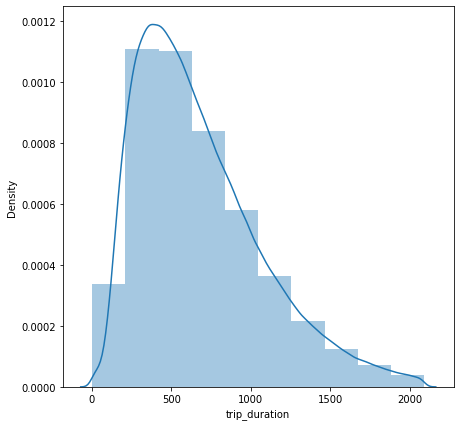

In [37]:
#visualizing target variable
plt.figure(figsize=(7,7))
sns.distplot(df['trip_duration'],bins=10)

Answer Here

#### Chart - 2

<AxesSubplot:xlabel='pickup_hour'>

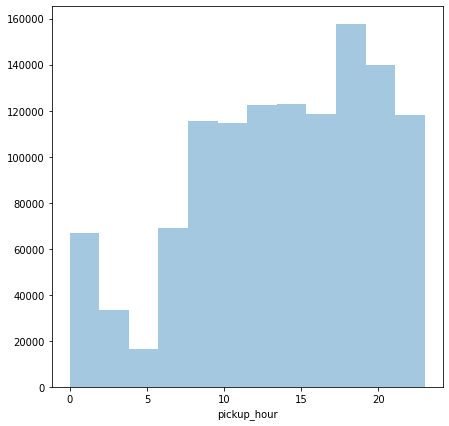

In [38]:
# Chart - 2 visualization code

plt.figure(figsize=(7,7))
sns.distplot(df['pickup_hour'],kde=False,bins=12)

Answer Here

#### Chart - 3

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

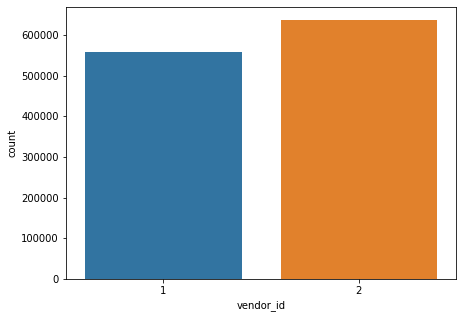

In [39]:
# Chart - 3 visualization code
fig = plt.figure(figsize = (7, 5))
 
# creating the count plot
sns.countplot(x=df.vendor_id)

Answer Here

#### Chart - 4

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

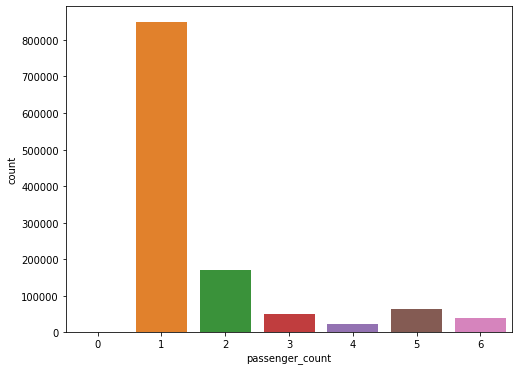

In [40]:
# Chart - 4 visualization code
fig = plt.figure(figsize = (8, 6))
sns.countplot(x=df.passenger_count)

Answer Here

#### Chart - 5

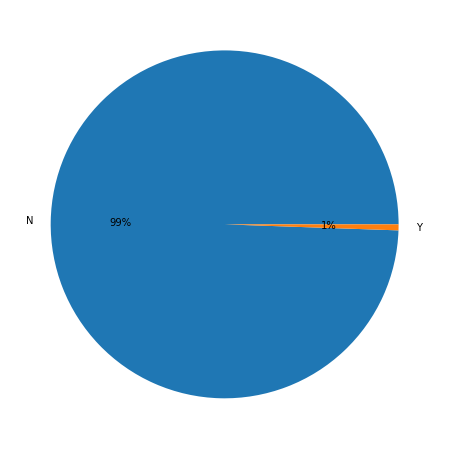

In [41]:
# Chart - 5 visualization code
fig = plt.figure(figsize = (8,8))

# plotting data on chart
plt.pie(x=flag_var_df['id'], labels=flag_var_df.index , autopct='%.0f%%')
  
# displaying chart
plt.show()

Answer Here

#### Chart - 6

<AxesSubplot:xlabel='weekday_name', ylabel='count'>

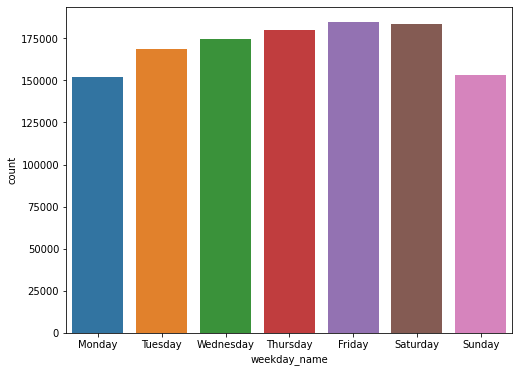

In [42]:
# Chart - 6 visualization code
fig = plt.figure(figsize = (8, 6))
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x=df.weekday_name, order=order)

Answer Here

#### Chart - 7

<AxesSubplot:xlabel='month', ylabel='count'>

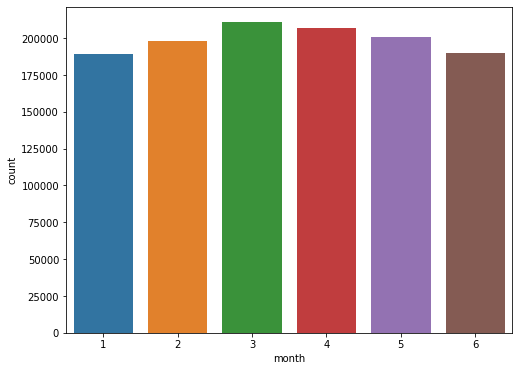

In [43]:
# Chart - 7 visualization code
fig = plt.figure(figsize = (8, 6))
sns.countplot(x=df.month)

Answer Here

#### Chart - 8

<AxesSubplot:xlabel='distance_in_km'>

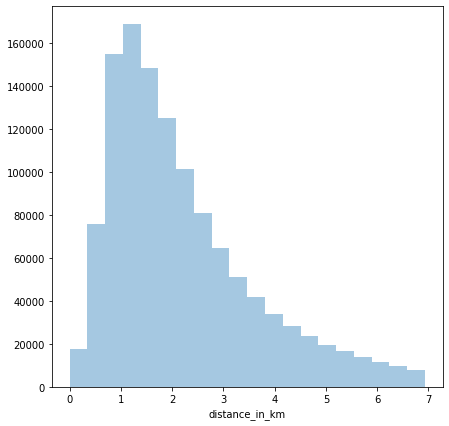

In [44]:
# Chart - 8 visualization code
plt.figure(figsize=(7,7))
sns.distplot(df.distance_in_km,kde=False,bins=20)

Answer Here

#### Chart - 9

<AxesSubplot:xlabel='avg_speed_kmph'>

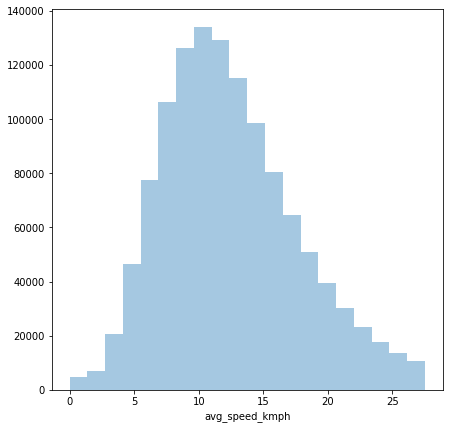

In [45]:
# Chart - 9 visualization code
plt.figure(figsize=(7,7))
sns.distplot(df.avg_speed_kmph,kde=False,bins=20)

Answer Here

### **Bivariate Analysis**

#### **Mean Trip Duration vs Hour**

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

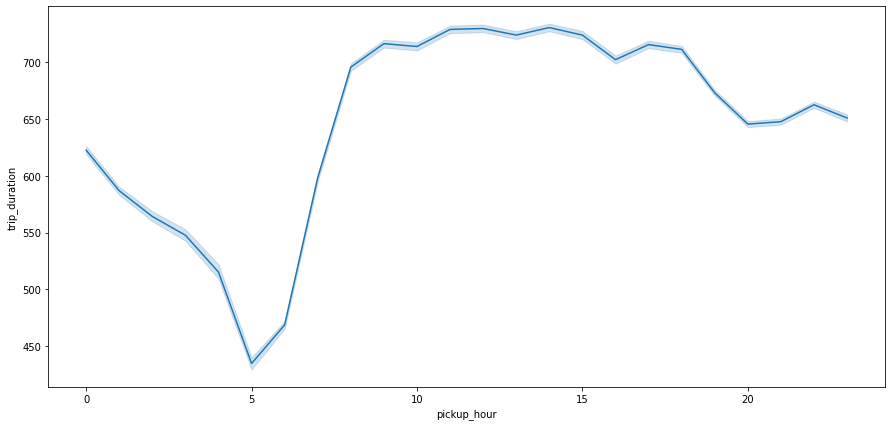

In [46]:
from numpy.core.fromnumeric import mean
# Chart - 10 visualization code
plt.figure(figsize=(15,7))
sns.lineplot(x=df['pickup_hour'], y=df['trip_duration'])
 

Answer Here.

#### **Trip Duration vs Day of Week**

<AxesSubplot:xlabel='weekday_name', ylabel='trip_duration'>

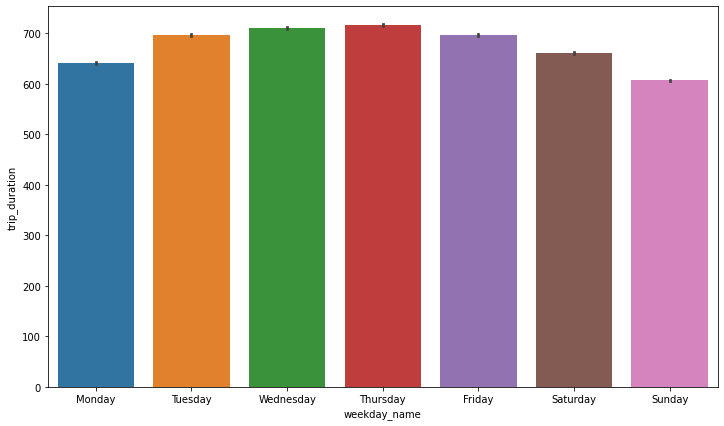

In [47]:
# Chart - 11 visualization code
plt.figure(figsize=(12,7))
sns.barplot(x=df['weekday_name'], y=df['trip_duration'], order=order )

Answer Here

#### **Trip Duration vs Month**

<AxesSubplot:xlabel='month', ylabel='trip_duration'>

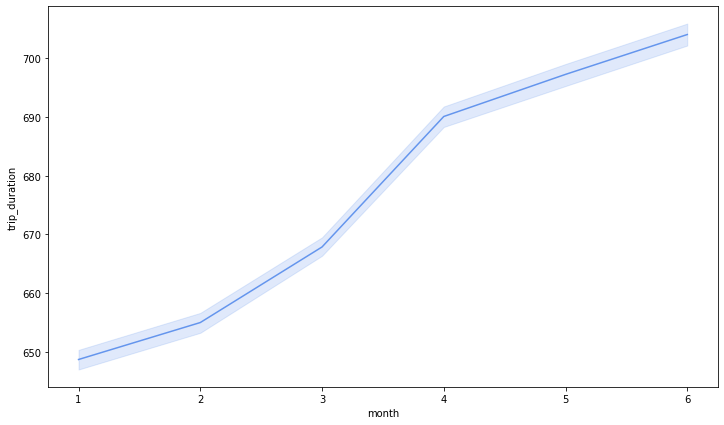

In [48]:
# Chart - 12 visualization code
plt.figure(figsize=(12,7))
sns.lineplot(x=df['month'], y=df['trip_duration'], color='cornflowerblue' )

Answer Here

#### **Trip Duration vs Vendor**

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

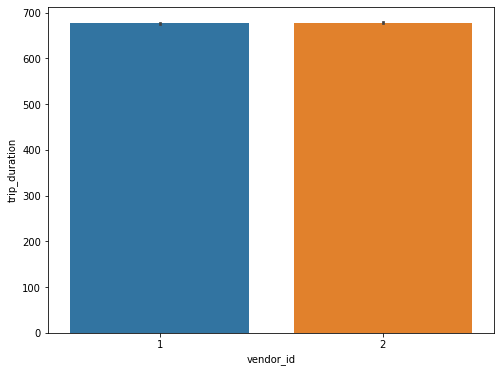

In [49]:
# Chart - 13 visualization code
plt.figure(figsize=(8,6))
sns.barplot(x=df['vendor_id'], y=df['trip_duration'] )

Answer Here

#### **Trip Duration vs Passenger Count**

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

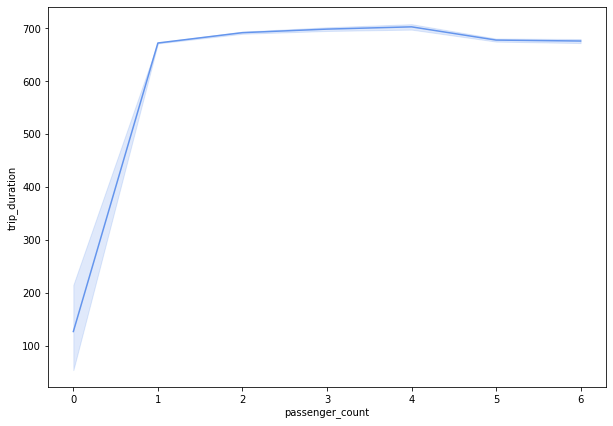

In [50]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df['passenger_count'], y=df['trip_duration'], color='cornflowerblue' )

#### **Trip Duration vs Store and forward flag**

<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='trip_duration'>

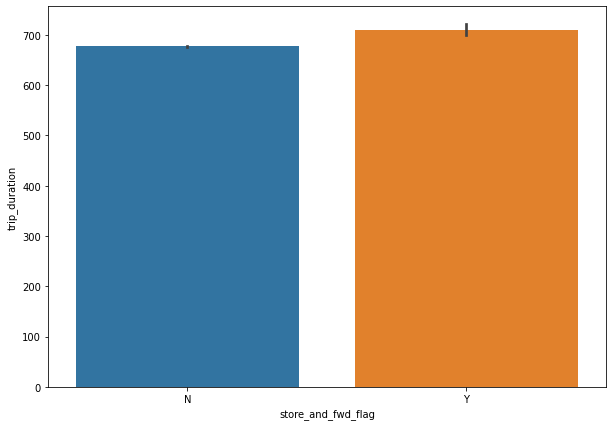

In [51]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['store_and_fwd_flag'], y=df['trip_duration'] )

#### **Distance vs Hour**

<AxesSubplot:xlabel='pickup_hour', ylabel='distance_in_km'>

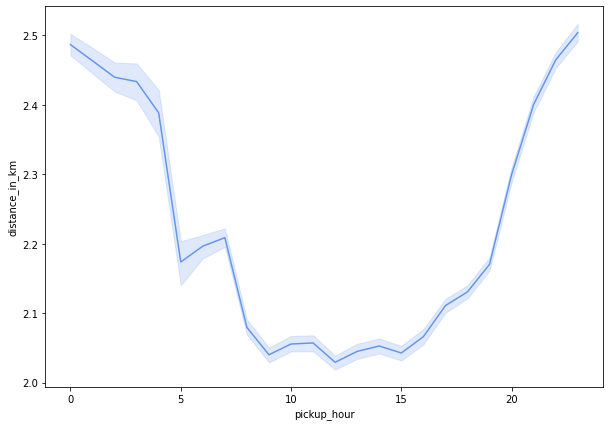

In [52]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df['pickup_hour'], y=df['distance_in_km'], color='cornflowerblue' )

#### **Distance vs Weekday**

<AxesSubplot:xlabel='weekday_name', ylabel='distance_in_km'>

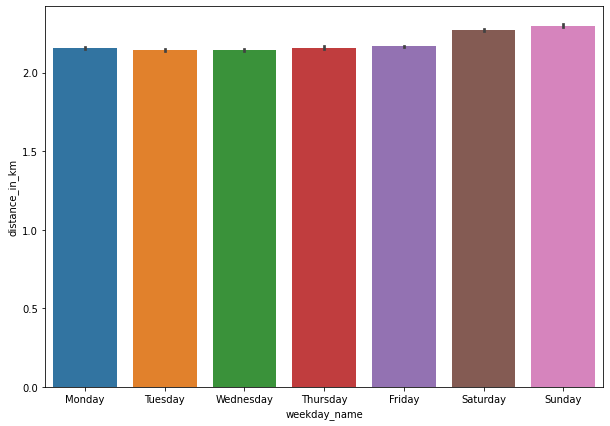

In [53]:
plt.figure(figsize=(10,7))

sns.barplot(x=df['weekday_name'], y=df['distance_in_km'], order=order )

#### **Distance vs Month**

<AxesSubplot:xlabel='month', ylabel='distance_in_km'>

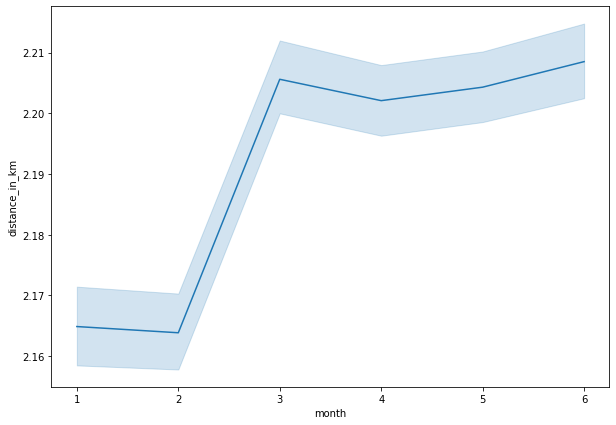

In [54]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df['month'], y=df['distance_in_km'] )

#### **Distance vs Vendor**

<AxesSubplot:xlabel='vendor_id', ylabel='distance_in_km'>

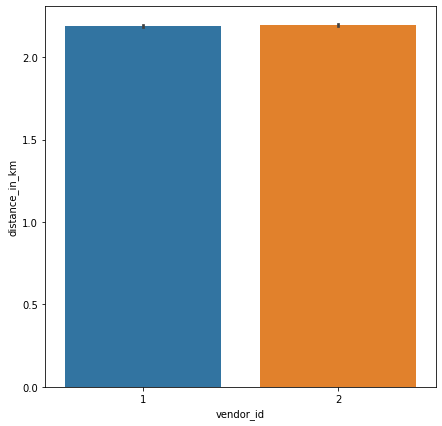

In [55]:
plt.figure(figsize=(7,7))
sns.barplot(x=df['vendor_id'], y=df['distance_in_km'] )

#### **Distance vs Trip Duration**

<AxesSubplot:xlabel='trip_duration', ylabel='distance_in_km'>

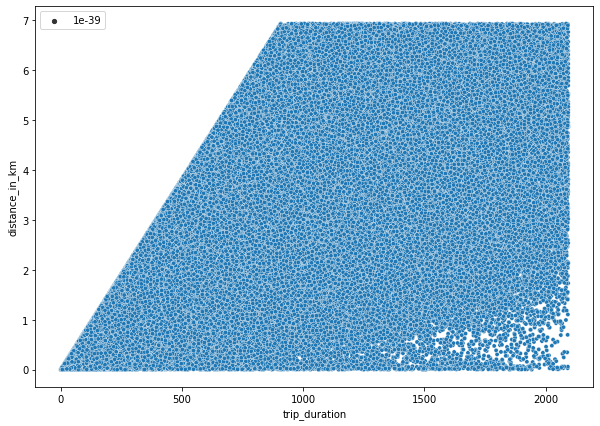

In [56]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['trip_duration'], y=df['distance_in_km'], size=0.000000000000000000000000000000000000001)

#### **Avg Speed vs Hour**

<AxesSubplot:xlabel='pickup_hour', ylabel='avg_speed_kmph'>

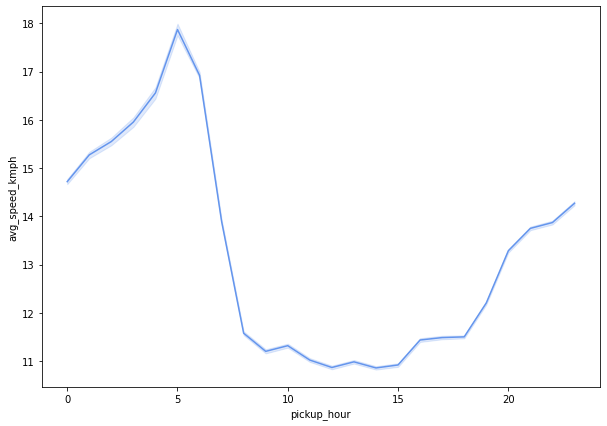

In [57]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df['pickup_hour'], y=df['avg_speed_kmph'], color='cornflowerblue' )

#### **Avg Speed vs Weekday**

<AxesSubplot:xlabel='weekday_name', ylabel='avg_speed_kmph'>

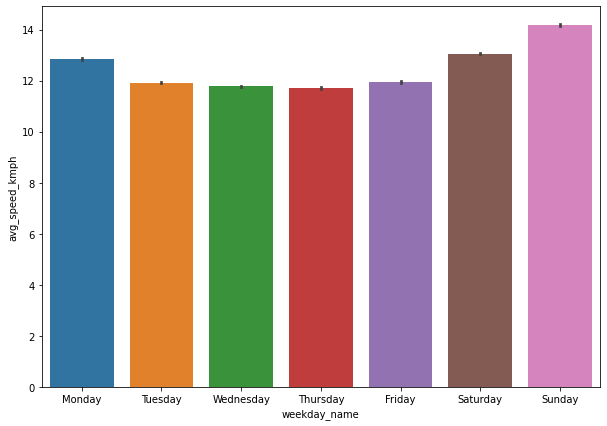

In [58]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['weekday_name'], y=df['avg_speed_kmph'], order=order )

#### **Passenger Count per Vendor**

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

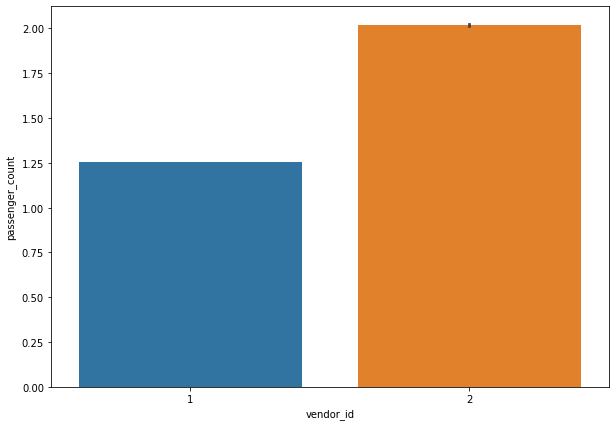

In [59]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['vendor_id'], y=df['passenger_count'] )

#### Chart - 14 - Correlation Heatmap

<AxesSubplot:>

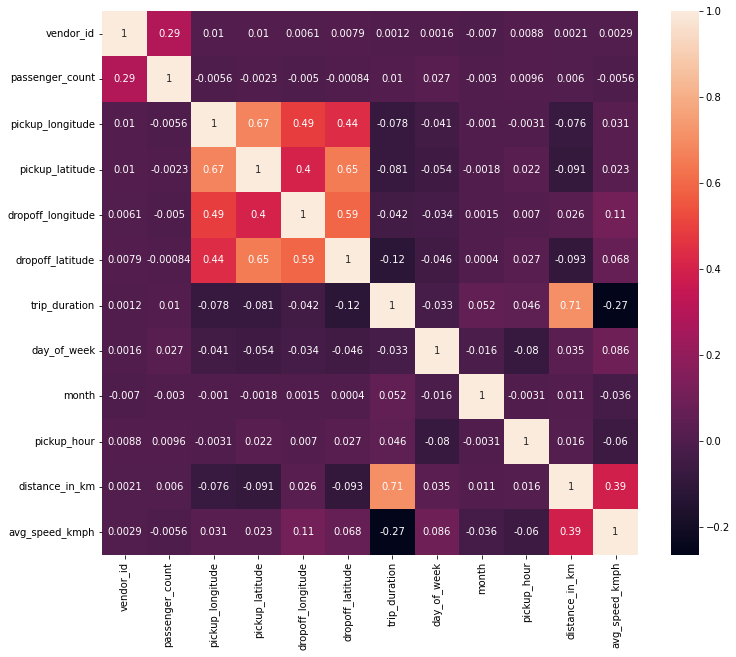

In [60]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [96]:
df.shape

(1195794, 17)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [61]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [62]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [63]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [64]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [65]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [66]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [67]:
# Expand Contraction

#### 2. Lower Casing

In [68]:
# Lower Casing

#### 3. Removing Punctuations

In [69]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [70]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [71]:
# Remove Stopwords

In [72]:
# Remove White spaces

#### 6. Rephrase Text

In [73]:
# Rephrase Text

#### 7. Tokenization

In [74]:
# Tokenization

#### 8. Text Normalization

In [75]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [76]:
# POS Taging

#### 10. Text Vectorization

In [77]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [78]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [79]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [80]:
# Transform Your data

### 6. Data Scaling

In [81]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [82]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [83]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [84]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [85]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [86]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [88]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [89]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [90]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [91]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [92]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [93]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [94]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***